# Datasets analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## xAPI-Educational Mining Dataset

In [3]:
dataset = pd.read_csv("xAPI-Edu-Data.csv")
dataset

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### General information

There are 480 students and 17 features for every student.


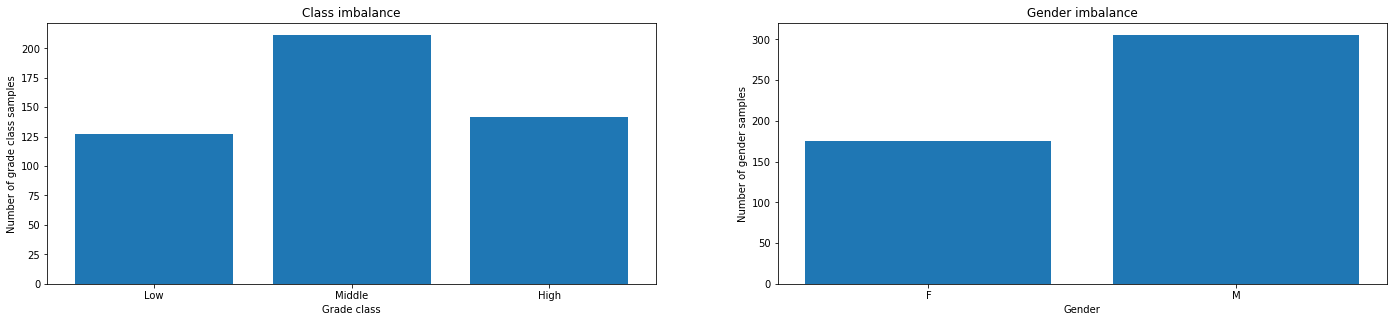

In [3]:
students_num = dataset.shape[0]
features_num = dataset.shape[1]
print("There are", students_num, "students and", features_num - 1, "features for every student.")

grade = dataset["Class"]
gender = dataset["gender"]
nationality = dataset["NationalITy"]

figure, axis = plt.subplots(1, 2, squeeze = False, figsize = (24, 4.8))
axis[0][0].set_title('Class imbalance')
axis[0][0].set_xlabel('Grade class')
axis[0][0].set_ylabel('Number of grade class samples')
labels, counts = np.unique(grade, return_counts=True)
axis[0][0].bar(['Low', 'Middle', 'High'], [counts[1], counts[2], counts[0]])
axis[0][1].set_title('Gender imbalance')
axis[0][1].set_xlabel('Gender')
axis[0][1].set_ylabel('Number of gender samples')
labels, counts = np.unique(gender, return_counts=True)
axis[0][1].bar(labels, counts)
plt.show()

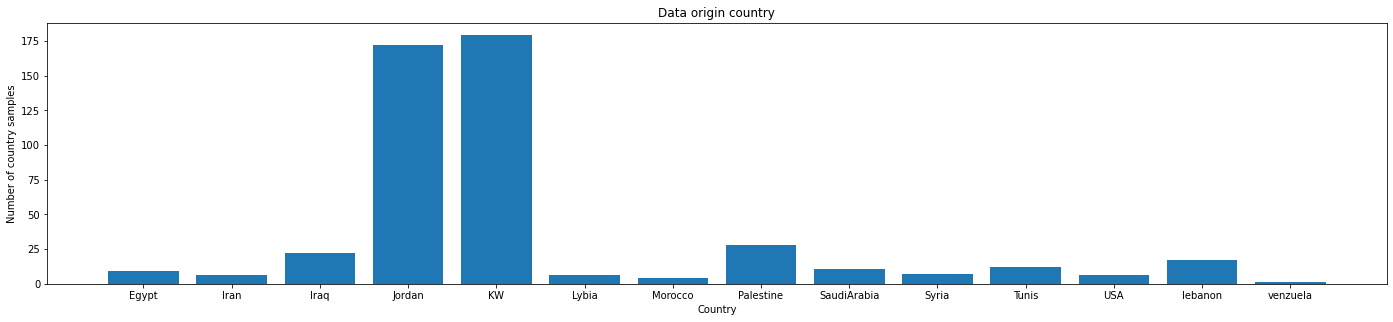

In [4]:
plt.figure(figsize=(24, 4.8))
plt.title('Data origin country')
plt.xlabel('Country')
plt.ylabel('Number of country samples')
labels, counts = np.unique(nationality, return_counts=True)
plt.bar(labels, counts)
plt.show()

### Correlations

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Class_H,Class_L,Class_M
0,15,16,2,20,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,20,20,3,25,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,10,7,0,30,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
476,50,77,14,28,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
477,55,74,25,29,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
478,30,17,14,57,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0


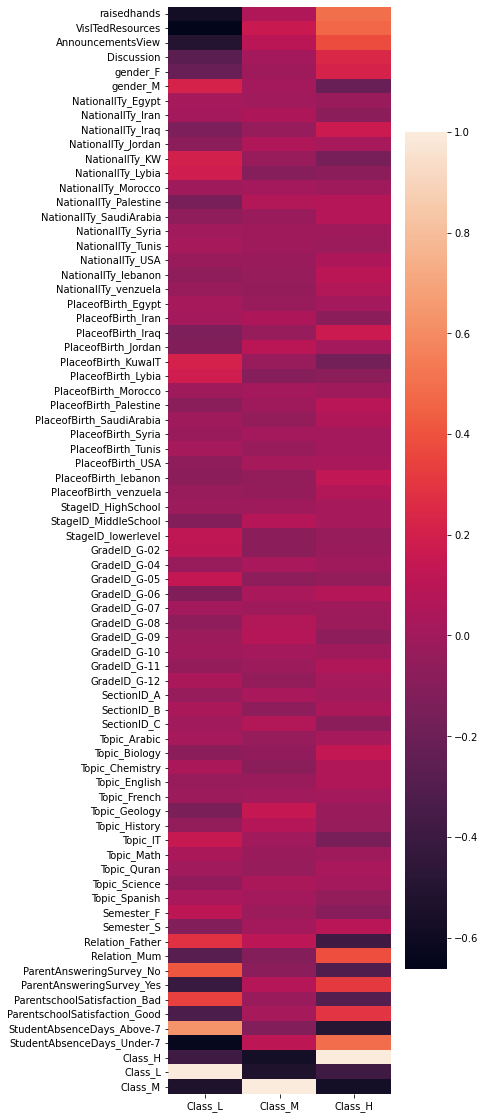

In [5]:
fig, ax = plt.subplots(figsize=(5, 20))
ax = sns.heatmap(pd.get_dummies(dataset).corr()[["Class_L", "Class_M", "Class_H"]], ax=ax)
pd.get_dummies(dataset)

In [6]:
print("Three absolute correlated features with low class grades:")
most_corr_features = list(pd.get_dummies(dataset).corr().abs().drop(["Class_L", "Class_M", "Class_H"]).sort_values("Class_L", ascending = False)[["Class_L"]][0:3].index)
print(pd.get_dummies(dataset).corr()[["Class_L"]].loc[most_corr_features])
print("Three absolute correlated features with middle class grades:")
most_corr_features = list(pd.get_dummies(dataset).corr().abs().drop(["Class_L", "Class_M", "Class_H"]).sort_values("Class_M", ascending = False)[["Class_M"]][0:3].index)
print(pd.get_dummies(dataset).corr()[["Class_M"]].loc[most_corr_features])
print("Three absolute correlated features with high class grades:")
most_corr_features = list(pd.get_dummies(dataset).corr().abs().drop(["Class_L", "Class_M", "Class_H"]).sort_values("Class_H", ascending = False)[["Class_H"]][0:3].index)
print(pd.get_dummies(dataset).corr()[["Class_H"]].loc[most_corr_features])

Three absolute correlated features with low class grades:
                             Class_L
VisITedResources           -0.662061
StudentAbsenceDays_Under-7 -0.631674
StudentAbsenceDays_Above-7  0.631674
Three absolute correlated features with middle class grades:
                             Class_M
VisITedResources            0.156442
Topic_Geology               0.143480
StudentAbsenceDays_Under-7  0.111142
Three absolute correlated features with high class grades:
                             Class_H
raisedhands                 0.495681
StudentAbsenceDays_Above-7 -0.489629
StudentAbsenceDays_Under-7  0.489629


## Portuguese schools Dataset

In [5]:
dataset = pd.read_csv("student-por.csv",sep=";")
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### General information

There are 649 students and 33 features for every student.


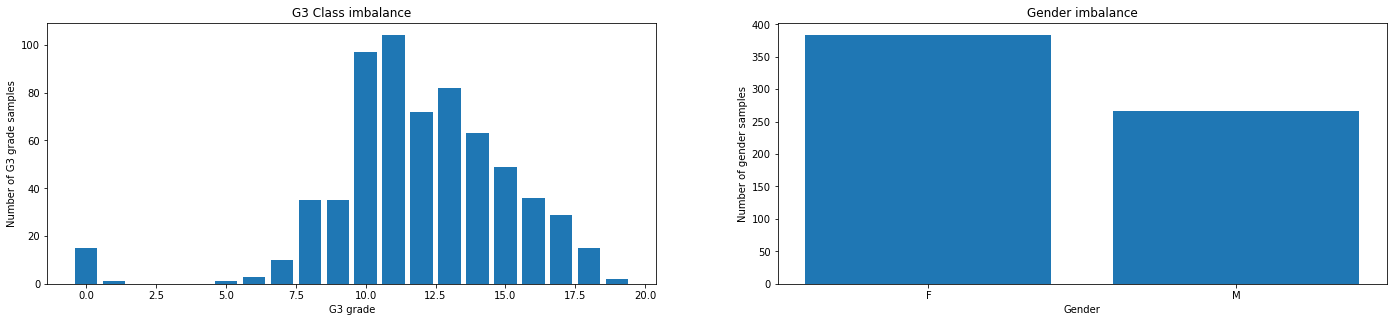

In [6]:
students_num = dataset.shape[0]
features_num = dataset.shape[1]
print("There are", students_num, "students and", features_num, "features for every student.")

g1_grade = dataset["G1"]
g2_grade = dataset["G2"]
g3_grade = dataset["G3"]
gender = dataset["sex"]

figure, axis = plt.subplots(1, 2, squeeze = False, figsize = (24, 4.8))
axis[0][0].set_title('G3 Class imbalance')
axis[0][0].set_xlabel('G3 grade')
axis[0][0].set_ylabel('Number of G3 grade samples')
labels, counts = np.unique(g3_grade, return_counts=True)
axis[0][0].bar(labels, counts)
axis[0][1].set_title('G3 Class imbalance')
axis[0][1].set_title('Gender imbalance')
axis[0][1].set_xlabel('Gender')
axis[0][1].set_ylabel('Number of gender samples')
labels, counts = np.unique(gender, return_counts=True)
axis[0][1].bar(labels, counts)
plt.show()

### Correlations

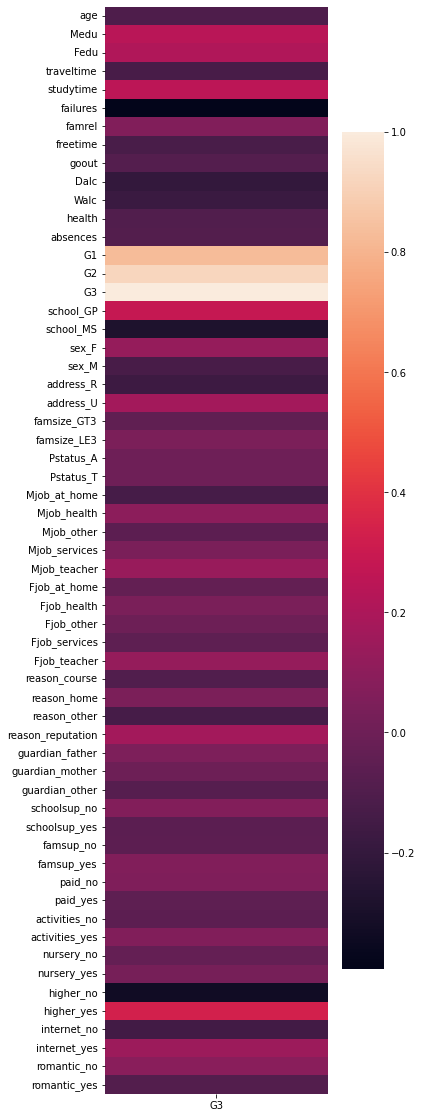

In [7]:
fig, ax = plt.subplots(figsize=(5, 20))
ax = sns.heatmap(pd.get_dummies(dataset).corr()[["G3"]], ax=ax)

In [8]:
print("Three most correlated features with G3 grades:")
most_corr_features = list(dataset.corr().abs().drop(["G3"]).sort_values("G3", ascending = False)[["G3"]][0:3].index)
print(dataset.corr()[["G3"]].loc[most_corr_features])

Three most correlated features with G3 grades:
                G3
G2        0.918548
G1        0.826387
failures -0.393316
